In [116]:
from datetime import datetime
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt


class MarketPattern:
    def __init__(self):
        self.heatmap_df = None
        self.dataset =  None
        self.symbols_dict ={'XLV':'Health Care', 'XLB': 'Materials', 'XLP' :'Consumer Staples', 'XLF': 'Financial',
                        'XLI':'Industrial', 'XLC' : 'Communication Services', 'XLK' : 'Technology',
                        'XLU': 'Utilities', 'XLY':'Consumer Discretionary' ,'XLE': 'Energy',
                        'VNQ':'Real Estate',
                        'TLT': 'Treasury',
                        'GLD':'Gold',
                        "HYBB":"BB bond"}
        start, end = self.make_period(periods=1)
        self._prepare_dataset(symbols = self.symbols_dict, start=start,end=end)
        pass
    
    def make_period(self, periods=10):
        today = datetime.today()
        end_date = today.strftime('%Y-%m-%d')
        start_date = (today - relativedelta(years=periods)).strftime('%Y-%m-%d')
        return start_date, end_date
        
    def _prepare_dataset(self, symbols, start, end):
        data = {}
        for symbol in symbols:
            ticker = yf.Ticker(symbol)
            historical_data = ticker.history(start=start, end=end)
            data[symbol] = historical_data['Close']

        dataset = pd.DataFrame(data)
        self.dataset = dataset.rename(columns=symbols)
        return self
    
    def _sharp_ratio(self, period):
        period = period.lower()
        excess_returns_df = self.dataset.pct_change(1).resample(period)
        sharp_df= excess_returns_df.mean() /excess_returns_df.std()
        heatmap_df = sharp_df.apply(lambda sharp: np.where(sharp>0, 1,0))
        if period == 'w': 
            format='%Y-%m, %Ww'
        elif period == 'm':  
            format='%Y-%mm'
        heatmap_df.index = heatmap_df.index.map(lambda idx:idx.strftime(format))
        self.heatmap_df = heatmap_df.sort_index(ascending=True)
        return self

    def heatmap(self, period='w'):
        plt.figure(figsize=(4, 10))  # Set the size in inches
        self._sharp_ratio(period)
        sns.heatmap(self.heatmap_df, cmap='Blues', cbar=False)  # cbar=False to hide the colorbar
        plt.show()
        
    def clustermap(self):
        sns.clustermap(mrktptn.dataset.corr(), cmap='coolwarm',vmax=1,vmin=-1)
        sns.despine()

    # def plot(self, mode='binary'):
    #     fig = PlotViz(self.heatmap).heatmap().update_layout(title=self.title, width=400, height=1000).update_yaxes().update_xaxes()
    #     if mode == 'binary':
    #         return fig.trx_to_byte()
    #     elif mode == 'show':
    #         return fig.show()

    # @staticmethod
    # def plot(mode='binary', period='w'):
    #     return MarketPattern(period)._plot(mode)


In [117]:
mrktptn = MarketPattern()

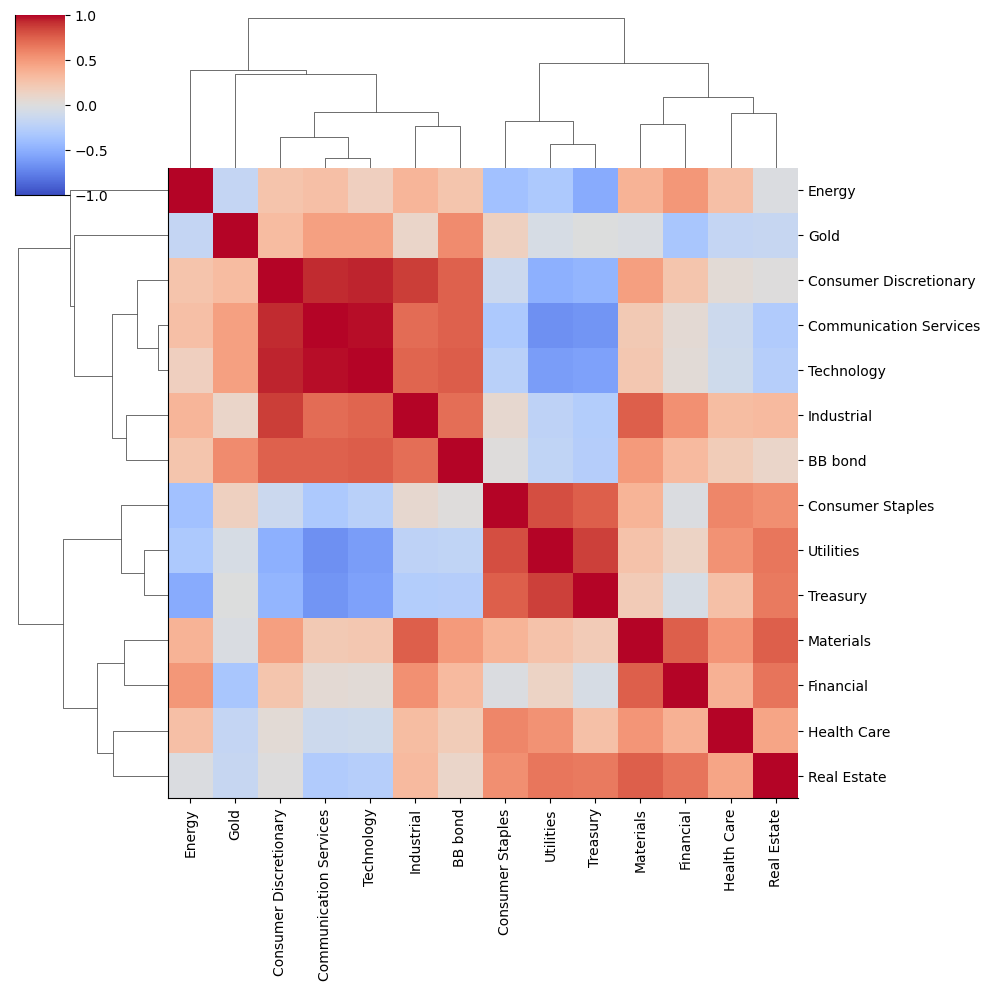

In [118]:
mrktptn.clustermap()

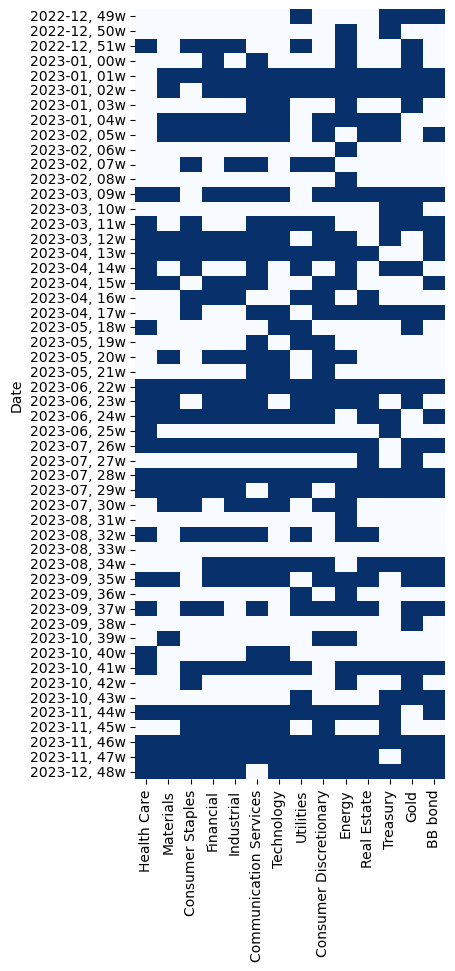

In [119]:
mrktptn.heatmap(period='w')

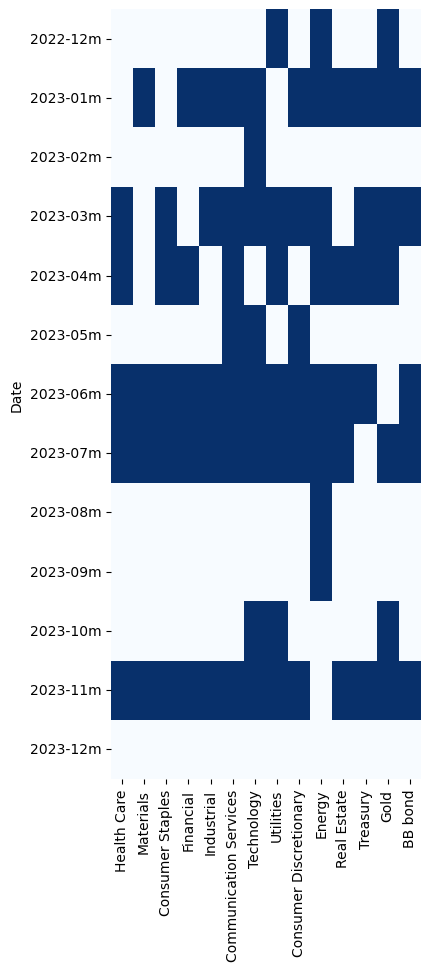

In [120]:
mrktptn.heatmap(period='m')

---